In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [43]:
data_50 = pd.read_csv('data_50.csv', index_col=0)

data_50['date'] = pd.to_datetime(data_50['date'])

data_50.drop(columns=['SH_TAG', 'station_no'], inplace=True)

data_50.head()

,date,discharge,water_level,incoming,RS,NSH_TAG,RSF_0.0,RSF_1.0,RSF_4.0,RSF_6.0,RSF_7.0,RSF_8.0,next_date,day_diff
0,1965-01-01,1320.0,219,1358.89,1.2,0,0,1,0,0,0,0,1/2/1965,1.0
1,1965-01-02,1650.0,272,1814.94,0.3,0,0,1,0,0,0,0,1/3/1965,1.0
2,1965-01-03,1950.0,315,1939.09,0.1,0,0,1,0,0,0,0,1/4/1965,1.0
3,1965-01-04,1870.0,304,1885.80,0.0,0,0,0,0,0,1,0,1/5/1965,1.0
4,1965-01-05,1870.0,304,1877.25,1.2,0,0,1,0,0,0,0,1/6/1965,1.0


In [44]:
data_50['day_num'] = data_50.date.dt.dayofyear

In [45]:
mod_data = data_50.set_index('day_num')

In [46]:
yrly_group = mod_data.groupby(mod_data.date.dt.year)

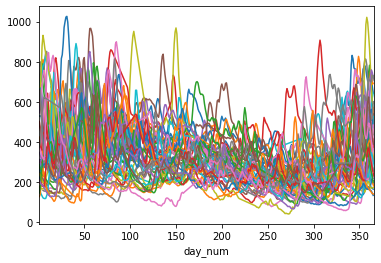

In [47]:
yrly_group['water_level'].plot();

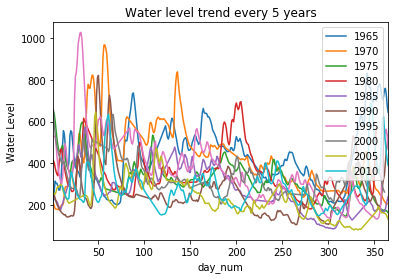

In [49]:
yrly_group.get_group(1965)['water_level'].plot()
yrly_group.get_group(1970)['water_level'].plot()
yrly_group.get_group(1975)['water_level'].plot()
yrly_group.get_group(1980)['water_level'].plot()
yrly_group.get_group(1985)['water_level'].plot()
yrly_group.get_group(1990)['water_level'].plot()
yrly_group.get_group(1995)['water_level'].plot()
yrly_group.get_group(2000)['water_level'].plot()
yrly_group.get_group(2005)['water_level'].plot()
yrly_group.get_group(2010)['water_level'].plot()
# yrly_group.get_group(2015)['water_level'].plot()
plt.ylabel('Water Level')
plt.legend([1965,1970,1975,1980,1985,1990,1995,2000,2005,2010])
plt.title('Water level trend every 5 years')
plt.savefig('Yearly_trend.png')
plt.show()

In [50]:
subset_data = data_50.iloc[:700]

In [51]:
subset_data[subset_data.day_diff == 17]

,date,discharge,water_level,incoming,RS,NSH_TAG,RSF_0.0,RSF_1.0,RSF_4.0,RSF_6.0,RSF_7.0,RSF_8.0,next_date,day_diff,day_num
105,1965-04-16,2440.0,381,2437.45,0.4,0,0,1,0,0,0,0,5/3/1965,17.0,106
195,1965-07-31,2950.0,442,2954.56,0.0,0,1,0,0,0,0,0,8/17/1965,17.0,212
285,1965-11-14,1490.0,246,1490.02,1.0,3,0,0,0,0,1,0,12/1/1965,17.0,318
375,1966-02-28,2950.0,442,2932.19,0.9,0,0,1,0,0,0,0,3/17/1966,17.0,59
465,1966-06-14,2220.0,353,2190.18,0.8,0,0,1,0,0,0,0,7/1/1966,17.0,165
555,1966-09-28,1520.0,251,1469.57,0.0,0,1,0,0,0,0,0,10/15/1966,17.0,271
645,1967-01-12,2920.0,439,2861.38,0.1,0,0,1,0,0,0,0,1/29/1967,17.0,12


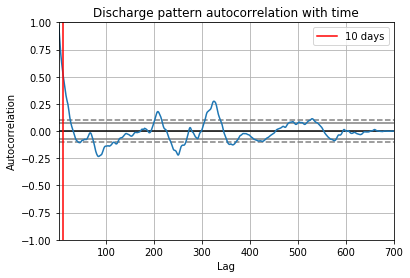

Correlation is observed in the future year, but is very low. We limit to 10 days where it is at least above 0.50 .


In [54]:
discharge = subset_data.discharge
# plt.plot(discharge.iloc[0:120])
# plt.xticks(rotation=45, ha='right')


from pandas.plotting import autocorrelation_plot
autocorrelation_plot(discharge)
plt.axvline(10, color='r', label='10 days')
plt.legend()
plt.title('Discharge pattern autocorrelation with time')
plt.savefig('autocorrelation_discharge.png')
plt.show()

print('Correlation is observed in the future year, but is very low. We limit to 10 days where it is at least above 0.50 .')

In [16]:
data_50.set_index('date', inplace=True)

In [17]:
new_data_50 = data_50.resample('D').mean()
new_data_50

,discharge,water_level,incoming,RS,NSH_TAG,RSF_0.0,RSF_1.0,RSF_4.0,RSF_6.0,RSF_7.0,RSF_8.0,day_diff,day_num
date,,,,,,,,,,,,,
1965-01-01,1320.00,219.0,1358.890,1.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1965-01-02,1650.00,272.0,1814.940,0.3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
1965-01-03,1950.00,315.0,1939.090,0.1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0
1965-01-04,1870.00,304.0,1885.800,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,4.0
1965-01-05,1870.00,304.0,1877.250,1.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0
1965-01-06,1770.00,290.0,1696.740,7.8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,6.0
1965-01-07,1650.00,272.0,1640.250,14.9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,7.0
1965-01-08,1650.00,272.0,1707.580,9.8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,8.0
1965-01-09,1830.00,299.0,2115.920,8.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,9.0


In [21]:
# 10 day difference has reasonable info.

In [18]:
from statsmodels.tsa.arima_model import ARIMA

# fit model
model = ARIMA(discharge, order=(10,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.discharge   No. Observations:                  699
Model:                ARIMA(10, 1, 0)   Log Likelihood               -4879.214
Method:                       css-mle   S.D. of innovations            260.073
Date:                Sat, 23 Nov 2019   AIC                           9782.427
Time:                        20:45:35   BIC                           9837.023
Sample:                             1   HQIC                          9803.533
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.5361     13.779      0.184      0.854     -24.470      29.542
ar.L1.D.discharge      0.6021      0.038     15.928      0.000       0.528       0.676
ar.L2.D.discharge   

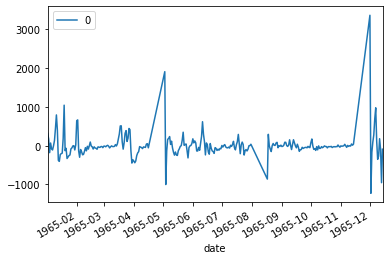

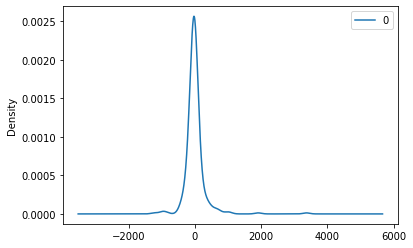

                 0
count   299.000000
mean     -0.169979
std     316.871384
min   -1228.458345
25%     -89.796570
50%     -23.091978
75%      31.854054
max    3365.262104


In [23]:
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [ ]:
# GETTING INDICES

In [33]:
idx = new_[new_.day_diff == 17].index

for i in idx:
    print(i)

prev = 100

Train = new_.discharge.iloc[temp-prev+1:temp+1]

Train
history = [x for x in Train]
# history

predictions = []
for t in range(16):
    model = ARIMA(history, order=(10,1,0))
    model_fit = model.fit(transparams=False, disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    history.append(yhat)
#     history.append(obs)
    print('predicted=%f' % (yhat))

In [39]:
prev = 90

def make_pred(df, columns): # For discharge column
#     The df has empty/NaN columns
    all_idx = df.index
    idx = df[df.day_diff == 17].index    # indices AFTER which we have to predict
    non_cvged_index = []
    
    for column in columns:
        
        for index in idx:
            print(index, column)
            N_idx = all_idx.get_loc(index)     # N_idx is the location of the index, previously temp
            Train = df[column].iloc[ N_idx-prev+1 : N_idx+1 ]
            history = [x for x in Train]

            predictions = []
            for t in range(16):       # Since we always have 16 missing days
                try:
                    model = ARIMA(history, order=(10,1,0))
                    model_fit = model.fit(transparams=False, disp=0)
                    output = model_fit.forecast()
                    yhat = output[0]
                    predictions.append(yhat)
                    history.append(yhat)
                    cvg = True
                    
                except:
                    if t==0:
                        non_cvged_index.append([index, column])
                        
                    cvg = False
                    
            if cvg == True:
                df[column].iloc[N_idx+1:N_idx+17] = predictions

    return df, non_cvged_index

In [40]:
out_df = make_pred(new_data_50, ['discharge', 'incoming', 'RS', 'NSH_TAG'])

1965-04-16 00:00:00 discharge
1965-07-31 00:00:00 discharge
1965-11-14 00:00:00 discharge
1966-02-28 00:00:00 discharge
1966-06-14 00:00:00 discharge
1966-09-28 00:00:00 discharge
1967-01-12 00:00:00 discharge
1967-04-28 00:00:00 discharge
1967-08-12 00:00:00 discharge
1967-11-26 00:00:00 discharge
1968-03-11 00:00:00 discharge
1968-06-25 00:00:00 discharge
1968-10-09 00:00:00 discharge
1969-01-23 00:00:00 discharge
1969-05-09 00:00:00 discharge
1969-08-23 00:00:00 discharge
1969-12-07 00:00:00 discharge
1970-03-23 00:00:00 discharge
1970-07-07 00:00:00 discharge
1970-10-21 00:00:00 discharge
1971-02-04 00:00:00 discharge
1971-05-21 00:00:00 discharge
1971-09-04 00:00:00 discharge
1971-12-19 00:00:00 discharge
1972-04-03 00:00:00 discharge
1972-07-18 00:00:00 discharge
1972-11-01 00:00:00 discharge
1973-02-15 00:00:00 discharge
1973-06-01 00:00:00 discharge
1973-09-15 00:00:00 discharge
1973-12-30 00:00:00 discharge
1974-04-15 00:00:00 discharge
1974-07-30 00:00:00 discharge
1974-11-13

1997-10-17 00:00:00 incoming
1998-01-31 00:00:00 incoming
1998-05-17 00:00:00 incoming
1998-08-31 00:00:00 incoming
1998-12-15 00:00:00 incoming
1999-03-31 00:00:00 incoming
1999-07-15 00:00:00 incoming
1999-10-29 00:00:00 incoming
2000-02-12 00:00:00 incoming
2000-05-28 00:00:00 incoming
2000-09-11 00:00:00 incoming
2000-12-26 00:00:00 incoming
2001-04-11 00:00:00 incoming
2001-07-26 00:00:00 incoming
2001-11-09 00:00:00 incoming
2002-02-23 00:00:00 incoming
2002-06-09 00:00:00 incoming
2002-09-23 00:00:00 incoming
2003-01-07 00:00:00 incoming
2003-04-23 00:00:00 incoming
2003-08-07 00:00:00 incoming
2003-11-21 00:00:00 incoming
2004-03-06 00:00:00 incoming
2004-06-20 00:00:00 incoming
2004-10-04 00:00:00 incoming
2005-01-18 00:00:00 incoming
2005-05-04 00:00:00 incoming
2005-08-18 00:00:00 incoming
2005-12-02 00:00:00 incoming
2006-03-18 00:00:00 incoming
2006-07-02 00:00:00 incoming
2006-10-16 00:00:00 incoming
2007-01-30 00:00:00 incoming
2007-05-16 00:00:00 incoming
2007-08-30 00:

1996-05-05 00:00:00 NSH_TAG
1996-08-19 00:00:00 NSH_TAG
1996-12-03 00:00:00 NSH_TAG
1997-03-19 00:00:00 NSH_TAG
1997-07-03 00:00:00 NSH_TAG
1997-10-17 00:00:00 NSH_TAG
1998-01-31 00:00:00 NSH_TAG
1998-05-17 00:00:00 NSH_TAG
1998-08-31 00:00:00 NSH_TAG
1998-12-15 00:00:00 NSH_TAG
1999-03-31 00:00:00 NSH_TAG
1999-07-15 00:00:00 NSH_TAG
1999-10-29 00:00:00 NSH_TAG
2000-02-12 00:00:00 NSH_TAG
2000-05-28 00:00:00 NSH_TAG
2000-09-11 00:00:00 NSH_TAG
2000-12-26 00:00:00 NSH_TAG
2001-04-11 00:00:00 NSH_TAG
2001-07-26 00:00:00 NSH_TAG
2001-11-09 00:00:00 NSH_TAG
2002-02-23 00:00:00 NSH_TAG
2002-06-09 00:00:00 NSH_TAG
2002-09-23 00:00:00 NSH_TAG
2003-01-07 00:00:00 NSH_TAG
2003-04-23 00:00:00 NSH_TAG
2003-08-07 00:00:00 NSH_TAG
2003-11-21 00:00:00 NSH_TAG
2004-03-06 00:00:00 NSH_TAG
2004-06-20 00:00:00 NSH_TAG
2004-10-04 00:00:00 NSH_TAG
2005-01-18 00:00:00 NSH_TAG
2005-05-04 00:00:00 NSH_TAG
2005-08-18 00:00:00 NSH_TAG
2005-12-02 00:00:00 NSH_TAG
2006-03-18 00:00:00 NSH_TAG
2006-07-02 00:00:00 

In [41]:
# out_df.to_csv('new_data_50.csv')

AttributeError: 'tuple' object has no attribute 'to_csv'

In [42]:
df_, lst = out_df

In [43]:
df_.to_csv('new_data_50.csv')

In [44]:
# Similarly for data_60

data_60 = pd.read_csv('data_60.csv', index_col=0)

data_60['date'] = pd.to_datetime(data_60['date'])

data_60.drop(columns=['SH_TAG', 'station_no'], inplace=True)

data_60.head()

,date,discharge,water_level,incoming,RS,NSH_TAG,RSF_0.0,RSF_1.0,RSF_4.0,RSF_6.0,RSF_7.0,RSF_8.0,next_date,day_diff
0,1965-01-01,1240.0,110,1290.0,1.2,0.0,0,1,0,0,0,0,1/2/1965,1.0
1,1965-01-02,1680.0,178,1660.0,0.3,0.0,0,1,0,0,0,0,1/3/1965,1.0
2,1965-01-03,1820.0,200,1630.0,0.1,0.0,0,1,0,0,0,0,1/4/1965,1.0
3,1965-01-04,1790.0,195,1690.0,0.0,0.0,0,0,0,0,1,0,1/5/1965,1.0
4,1965-01-05,1800.0,196,1630.0,1.2,0.0,0,1,0,0,0,0,1/6/1965,1.0


In [45]:
data_60['day_num'] = data_60.date.dt.dayofyear

In [46]:
data_60.set_index('date', inplace=True)
new_data_60 = data_60.resample('D').mean()
new_data_60

,discharge,water_level,incoming,RS,NSH_TAG,RSF_0.0,RSF_1.0,RSF_4.0,RSF_6.0,RSF_7.0,RSF_8.0,day_diff,day_num
date,,,,,,,,,,,,,
1965-01-01,1240.000,110.0,1290.000,1.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1965-01-02,1680.000,178.0,1660.000,0.3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
1965-01-03,1820.000,200.0,1630.000,0.1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0
1965-01-04,1790.000,195.0,1690.000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,4.0
1965-01-05,1800.000,196.0,1630.000,1.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0
1965-01-06,1630.000,171.0,1460.000,7.8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,6.0
1965-01-07,1560.000,161.0,1410.000,14.9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,7.0
1965-01-08,1580.000,163.0,1420.000,9.8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,8.0
1965-01-09,1800.000,197.0,1660.000,8.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,9.0


In [48]:
out_60 = make_pred(new_data_60, ['discharge', 'incoming', 'RS', 'NSH_TAG'])

1965-04-16 00:00:00 discharge
1965-07-31 00:00:00 discharge
1965-11-14 00:00:00 discharge
1966-02-28 00:00:00 discharge
1966-06-14 00:00:00 discharge
1966-09-28 00:00:00 discharge
1967-01-12 00:00:00 discharge
1967-04-28 00:00:00 discharge
1967-08-12 00:00:00 discharge
1967-11-26 00:00:00 discharge
1968-03-11 00:00:00 discharge
1968-06-25 00:00:00 discharge
1968-10-09 00:00:00 discharge
1969-01-23 00:00:00 discharge
1969-05-09 00:00:00 discharge
1969-08-23 00:00:00 discharge
1969-12-07 00:00:00 discharge
1970-03-23 00:00:00 discharge
1970-07-07 00:00:00 discharge
1970-10-21 00:00:00 discharge
1971-02-04 00:00:00 discharge
1971-05-21 00:00:00 discharge
1971-09-04 00:00:00 discharge
1971-12-19 00:00:00 discharge
1972-04-03 00:00:00 discharge
1972-07-18 00:00:00 discharge
1972-11-01 00:00:00 discharge
1973-02-15 00:00:00 discharge
1973-06-01 00:00:00 discharge
1973-09-15 00:00:00 discharge
1973-12-30 00:00:00 discharge
1974-04-15 00:00:00 discharge
1974-07-30 00:00:00 discharge
1974-11-13

1997-10-17 00:00:00 incoming
1998-01-31 00:00:00 incoming
1998-05-17 00:00:00 incoming
1998-08-31 00:00:00 incoming
1998-12-15 00:00:00 incoming
1999-03-31 00:00:00 incoming
1999-07-15 00:00:00 incoming
1999-10-29 00:00:00 incoming
2000-02-12 00:00:00 incoming
2000-05-28 00:00:00 incoming
2000-09-11 00:00:00 incoming
2000-12-26 00:00:00 incoming
2001-04-11 00:00:00 incoming
2001-07-26 00:00:00 incoming
2001-11-09 00:00:00 incoming
2002-02-23 00:00:00 incoming
2002-06-09 00:00:00 incoming
2002-09-23 00:00:00 incoming
2003-01-07 00:00:00 incoming
2003-04-23 00:00:00 incoming
2003-08-07 00:00:00 incoming
2003-11-21 00:00:00 incoming
2004-03-06 00:00:00 incoming
2004-06-20 00:00:00 incoming
2004-10-04 00:00:00 incoming
2005-01-18 00:00:00 incoming
2005-05-04 00:00:00 incoming
2005-08-18 00:00:00 incoming
2005-12-02 00:00:00 incoming
2006-03-18 00:00:00 incoming
2006-07-02 00:00:00 incoming
2006-10-16 00:00:00 incoming
2007-01-30 00:00:00 incoming
2007-05-16 00:00:00 incoming
2007-08-30 00:

1996-05-05 00:00:00 NSH_TAG
1996-08-19 00:00:00 NSH_TAG
1996-12-03 00:00:00 NSH_TAG
1997-03-19 00:00:00 NSH_TAG
1997-07-03 00:00:00 NSH_TAG
1997-10-17 00:00:00 NSH_TAG
1998-01-31 00:00:00 NSH_TAG
1998-05-17 00:00:00 NSH_TAG
1998-08-31 00:00:00 NSH_TAG
1998-12-15 00:00:00 NSH_TAG
1999-03-31 00:00:00 NSH_TAG
1999-07-15 00:00:00 NSH_TAG
1999-10-29 00:00:00 NSH_TAG
2000-02-12 00:00:00 NSH_TAG
2000-05-28 00:00:00 NSH_TAG
2000-09-11 00:00:00 NSH_TAG
2000-12-26 00:00:00 NSH_TAG
2001-04-11 00:00:00 NSH_TAG
2001-07-26 00:00:00 NSH_TAG
2001-11-09 00:00:00 NSH_TAG
2002-02-23 00:00:00 NSH_TAG
2002-06-09 00:00:00 NSH_TAG
2002-09-23 00:00:00 NSH_TAG
2003-01-07 00:00:00 NSH_TAG
2003-04-23 00:00:00 NSH_TAG
2003-08-07 00:00:00 NSH_TAG
2003-11-21 00:00:00 NSH_TAG
2004-03-06 00:00:00 NSH_TAG
2004-06-20 00:00:00 NSH_TAG
2004-10-04 00:00:00 NSH_TAG
2005-01-18 00:00:00 NSH_TAG
2005-05-04 00:00:00 NSH_TAG
2005-08-18 00:00:00 NSH_TAG
2005-12-02 00:00:00 NSH_TAG
2006-03-18 00:00:00 NSH_TAG
2006-07-02 00:00:00 

In [49]:
df_60, lst = out_60
df_60.to_csv('new_data_60.csv')

Data cleansing: Removing negative RS and NSH_TAG

In [32]:
new_data_50 = pd.read_csv('new_data_50.csv')
new_data_60 = pd.read_csv('new_data_60.csv')

In [33]:
new_data_50.head()

,date,discharge,water_level,incoming,RS,NSH_TAG,RSF_0.0,RSF_1.0,RSF_4.0,RSF_6.0,RSF_7.0,RSF_8.0,day_diff,day_num
0,1/1/1965,1320.0,219.0,1358.89,1.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,1/2/1965,1650.0,272.0,1814.94,0.3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
2,1/3/1965,1950.0,315.0,1939.09,0.1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0
3,1/4/1965,1870.0,304.0,1885.80,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,4.0
4,1/5/1965,1870.0,304.0,1877.25,1.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0


In [34]:
new_data_50[new_data_50.RS < 0]

,date,discharge,water_level,incoming,RS,NSH_TAG,RSF_0.0,RSF_1.0,RSF_4.0,RSF_6.0,RSF_7.0,RSF_8.0,day_diff,day_num
636,9/29/1966,1453.037029,NaN,1469.440313,-0.395900,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
637,9/30/1966,1403.508293,NaN,1477.642818,-0.494502,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
638,10/1/1966,1388.143950,NaN,1487.171627,-0.552765,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
639,10/2/1966,1395.824237,NaN,1496.653997,-0.656613,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
640,10/3/1966,1402.450496,NaN,1495.834578,-0.701074,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
641,10/4/1966,1399.202854,NaN,1488.437276,-0.802723,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
642,10/5/1966,1395.030439,NaN,1472.461723,-0.859344,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
643,10/6/1966,1382.756533,NaN,1445.751014,-0.886408,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
644,10/7/1966,1365.240430,NaN,1410.925205,-0.990527,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
645,10/8/1966,1344.164226,NaN,1375.711915,-1.064532,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
def f(x):
    return max(0, x)

In [36]:
new_data_50['RS'] = new_data_50.RS.apply(lambda x: f(x)) 
new_data_50['NSH_TAG'] = new_data_50.NSH_TAG.apply(lambda x: f(x)) 
new_data_60['RS'] = new_data_60.RS.apply(lambda x: f(x)) 
new_data_60['NSH_TAG'] = new_data_60.NSH_TAG.apply(lambda x: f(x)) 

In [37]:
new_data_50[new_data_50.RS < 0]

,date,discharge,water_level,incoming,RS,NSH_TAG,RSF_0.0,RSF_1.0,RSF_4.0,RSF_6.0,RSF_7.0,RSF_8.0,day_diff,day_num


Data analysis showed that the categorical data `RSF` wasn't too important and that factor can be compensated by the `RS` feature.

In [39]:
new_data_50.drop(columns=['RSF_0.0', 'RSF_1.0','RSF_4.0','RSF_6.0','RSF_7.0','RSF_8.0'], inplace=True)
new_data_60.drop(columns=['RSF_0.0', 'RSF_1.0','RSF_4.0','RSF_6.0','RSF_7.0','RSF_8.0'], inplace=True)
new_data_50.head()

,date,discharge,water_level,incoming,RS,NSH_TAG,day_diff,day_num
0,1/1/1965,1320.0,219.0,1358.89,1.2,0.0,1.0,1.0
1,1/2/1965,1650.0,272.0,1814.94,0.3,0.0,1.0,2.0
2,1/3/1965,1950.0,315.0,1939.09,0.1,0.0,1.0,3.0
3,1/4/1965,1870.0,304.0,1885.80,0.0,0.0,1.0,4.0
4,1/5/1965,1870.0,304.0,1877.25,1.2,0.0,1.0,5.0


In [40]:
new_data_50.to_csv('new_data_50.csv')
new_data_60.to_csv('new_data_60.csv')